In [1]:
# 파이썬 ≥3.5 필수

import sys

assert sys.version_info >= (3, 5)


# 사이킷런 ≥0.20 필수

import sklearn

assert sklearn.__version__ >= "0.20"


try:

  # %tensorflow_version은 코랩 명령입니다.

  %tensorflow_version 2.x

  !pip install -q -U tfx

  print("패키지 호환 에러는 무시해도 괜찮습니다.")

except Exception:

  pass


# 텐서플로 ≥2.0 필수

import tensorflow as tf

from tensorflow import keras

assert tf.__version__ >= "2.0"


# 공통 모듈 임포트

import numpy as np

import os


# 노트북 실행 결과를 동일하게 유지하기 위해

np.random.seed(42)


# 깔끔한 그래프 출력을 위해

%matplotlib inline

import matplotlib as mpl

import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)

mpl.rc('xtick', labelsize=12)

mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치

PROJECT_ROOT_DIR = "."

CHAPTER_ID = "data"

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)

  print("그림 저장:", fig_id)

  if tight_layout:

    plt.tight_layout()

  plt.savefig(path, format=fig_extension, dpi=resolution)



     |████████████████████████████████| 2.1MB 12.8MB/s 
     |████████████████████████████████| 63.8MB 69kB/s 
     |████████████████████████████████| 1.7MB 47.3MB/s 
     |████████████████████████████████| 112kB 55.0MB/s 
     |████████████████████████████████| 2.8MB 51.6MB/s 
     |████████████████████████████████| 8.9MB 32.4MB/s 
     |████████████████████████████████| 153kB 62.2MB/s 
     |████████████████████████████████| 92kB 8.5MB/s 
     |████████████████████████████████| 1.5MB 43.6MB/s 
     |████████████████████████████████| 2.2MB 49.8MB/s 
     |████████████████████████████████| 1.3MB 41.6MB/s 
     |████████████████████████████████| 389kB 60.4MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 788kB 30.9MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 153kB 59.3MB/s 
     |████████████████████████████████| 2.0MB 48.2MB/s 
 

## 큰 규모 데이터 셋 사용
- 텐서플로는 데이터 API 덕분에 큰 규모의 데이터 셋을 효율적으로 로드하고 전처리 가능
- 데이터셋 객체를 만들고 데이터를 읽어 올 위치와 변환 방법을 지정 -> 텐서플로가 멀티스레딩, 큐, 배치, 프리페치 같은 상세한 사항을 모두 대신 처리
- 데이터 API는 텍스트 파일(CSV 파일), 고정 길이의 레코드를 가진 이진 파일, 텐서플로의 TFRecord 포맷을 사용하는 이음 파일에서 데이터를 읽을 수 있음
- SQL 데이터베이스에서 읽는 기능 지원
- 대용량 데이터를 효율적으로 읽는 것은 일반적으로 정규화와 같은 데이터 전처리 필요
- 텍스트 특성이나 범주형 특성은 원-핫 인코딩, BoW 인코딩, 임베딩 등을 사용하여 인코딩 되어야 함
- 하나의 임베딩은 범주나 토큰을 표현하는 훈련 가능한 밀집 벡터
- 이러한 모든 전처리 과정을 처리하기 위해 사용자 정의 전처리 층 만드는 방법 존재


## 데이터 셋

In [2]:
X = tf.range(20) # 샘플 데이터 텐서
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

from_tensor_slices() 함수는 텐서를 받아 X의 각 원소가 아이템으로 표현되는 tf.data.Dataset을 생성(아이템이란 Dataset의 원소)

In [3]:
# 위 코드와 동일
dataset = tf.data.Dataset.range(10)

In [4]:
for item in dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


## 연쇄 변환

In [5]:
dataset = dataset.repeat(3).batch(7)
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)


+ repeat() 메서드로 원본 데이터셋의 아이템을 세차례 반복하는 새로운 데이터셋 반환
+ batch() 메서드를 호출하여 배치크기를 정하고 새로운 데이터셋 반환
+ batch() 메서드의 마지막은 마지막 데이터셋의 아이템을 순회(여기서는 [8,9]) 
+ batch() 메서드를 ```drop_remainder=True```로 호출하면 길이가 모자란 마지막 배치를 버리고 모든 배치를 동일한 크기로 맞춤

In [6]:
dataset = dataset.map(lambda x:x*2)

In [7]:
for item in dataset:
  print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int64)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int64)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int64)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int64)
tf.Tensor([16 18], shape=(2,), dtype=int64)


In [8]:
dataset = dataset.unbatch()
# 배치를 해제할 수도 있음

In [9]:
for item in dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, sh

In [10]:
dataset = dataset.filter(lambda x:x<10)
for item in dataset.take(3):
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


In [11]:
for item in dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


## 데이터 셔플링

In [12]:
tf.random.set_seed(42)

dataset = tf.data.Dataset.range(10).repeat(3) # 0~9 세번 반복
dataset = dataset.shuffle(buffer_size=3, seed=42).batch(7)
for item in dataset:
  print(item)

tf.Tensor([1 3 0 4 2 5 6], shape=(7,), dtype=int64)
tf.Tensor([8 7 1 0 3 2 5], shape=(7,), dtype=int64)
tf.Tensor([4 6 9 8 9 7 0], shape=(7,), dtype=int64)
tf.Tensor([3 1 4 5 2 8 7], shape=(7,), dtype=int64)
tf.Tensor([6 9], shape=(2,), dtype=int64)


- 메모리 용량보다 큰 대규모 데이터셋은 버퍼가 데이터셋에 비해 작기 때문에 간단한 셔플링 버퍼 방식으로는 불충분 -> 원본 데이터 자체를 섞음
- 원본 데이터를 섞고 일반적으로 에포크마다 한번 더 섞음

## 캘리포니아 주택 데이터셋을 여러 개의 CSV로 나누기

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1,1), random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

메모리에 맞지 않는 매우 큰 데이터셋인 경우 일반적으로 먼저 여러 개의 파일로 나누고 텐서플로에서 이 파일들을 병렬로 읽게함

데모를 위해 주택 데이터셋을 20개의 CSV 파일로 나눔



In [14]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
  housing_dir = os.path.join("datasets", "housing")
  os.makedirs(housing_dir, exist_ok=True)
  path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

  filepaths = []
  m = len(data)
  for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
    part_csv = path_format.format(name_prefix, file_idx)
    filepaths.append(part_csv)
    with open(part_csv, "wt", encoding="utf-8") as f:
      if header is not None:
        f.write(header)
        f.write("\n")
      for row_idx in row_indices:
        f.write(",".join([repr(col) for col in data[row_idx]]))
        f.write("\n")
  return filepaths
    

In [15]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data,'train',header,n_parts=20)
valid_filepaths = save_to_multiple_csv_files(train_data,'valid',header,n_parts=10)
test_filepaths = save_to_multiple_csv_files(train_data,'test',header,n_parts=10)

In [16]:
import pandas as pd

pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


In [17]:
train_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

## 입력 파이프라인 만들기

In [18]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

list_file() 함수는 파일 경로를 섞은 데이터셋을 반환

In [19]:
filepath_dataset

<ShuffleDataset shapes: (), types: tf.string>

In [20]:
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length = n_readers
)

- interleave() 메서드를 호출하여 한 번에 다섯 개(n_readers=5)의 파일을 한 줄씩 번갈아 읽음(파일 첫 번째 줄은 열 이름이므로 ```skip(1)```메서드로 건너뜀
- interleave() 는 filepath_dataset의 다섯개의 파일 경로에서 데이터를 읽는 데이터셋을 만듬
- interleave() 에 전달한 함수(여기서는 TextLineDataset() 을 만듬)

In [21]:
for line in dataset.take(5):
  print(line.numpy())

b'4.7361,7.0,7.464968152866242,1.1178343949044587,846.0,2.694267515923567,34.49,-117.27,1.745'
b'3.6641,17.0,5.577142857142857,1.1542857142857144,511.0,2.92,40.85,-121.07,0.808'
b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418'
b'3.6875,44.0,4.524475524475524,0.993006993006993,457.0,3.195804195804196,34.04,-118.15,1.625'
b'2.3,25.0,5.828178694158075,0.9587628865979382,909.0,3.1237113402061856,36.25,-119.4,1.328'


## 데이터 전처리

In [22]:
n_inputs = 8 # X_train.shape[-1]

@tf.function
def preprocess(line):
  defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
  fields = tf.io.decode_csv(line, record_defaults=defs)
  x = tf.stack(fields[:-1])
  y = tf.stack(fields[-1:])
  return (x - X_mean) / X_std, y

- preprocess 함수는 CSV 한 라인을 받아 파싱 ->
tf.io.decode_csv 함수 사용(파싱할 라인과 CSV 파일의 각 열에 대한 기본값을 담은 배열을 파라미터로 받음)
- 이 예에서는 모든 특성 열이 실수이고 누락된 값의 기본값은 0으로 지정
- 마지막 열(타깃)에 tf.float32 타입의 빈 배열을 제공
- 이 배열은 텐서플로에게 이 열은 실수이지만 기본값이 없다고 알려줌 -> 열에 누락된 값이 발생하면 예외가 발생

In [23]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579157,  1.216324  , -0.05204565, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

## 데이터 적재와 전처리 합치기


In [24]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
  dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
  dataset = dataset.interleave(
      lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
      cycle_length=n_readers, num_parallel_calls=n_read_threads)
  dataset = dataset.shuffle(shuffle_buffer_size)
  dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
  dataset = dataset.batch(batch_size)
  return dataset.prefetch(1)

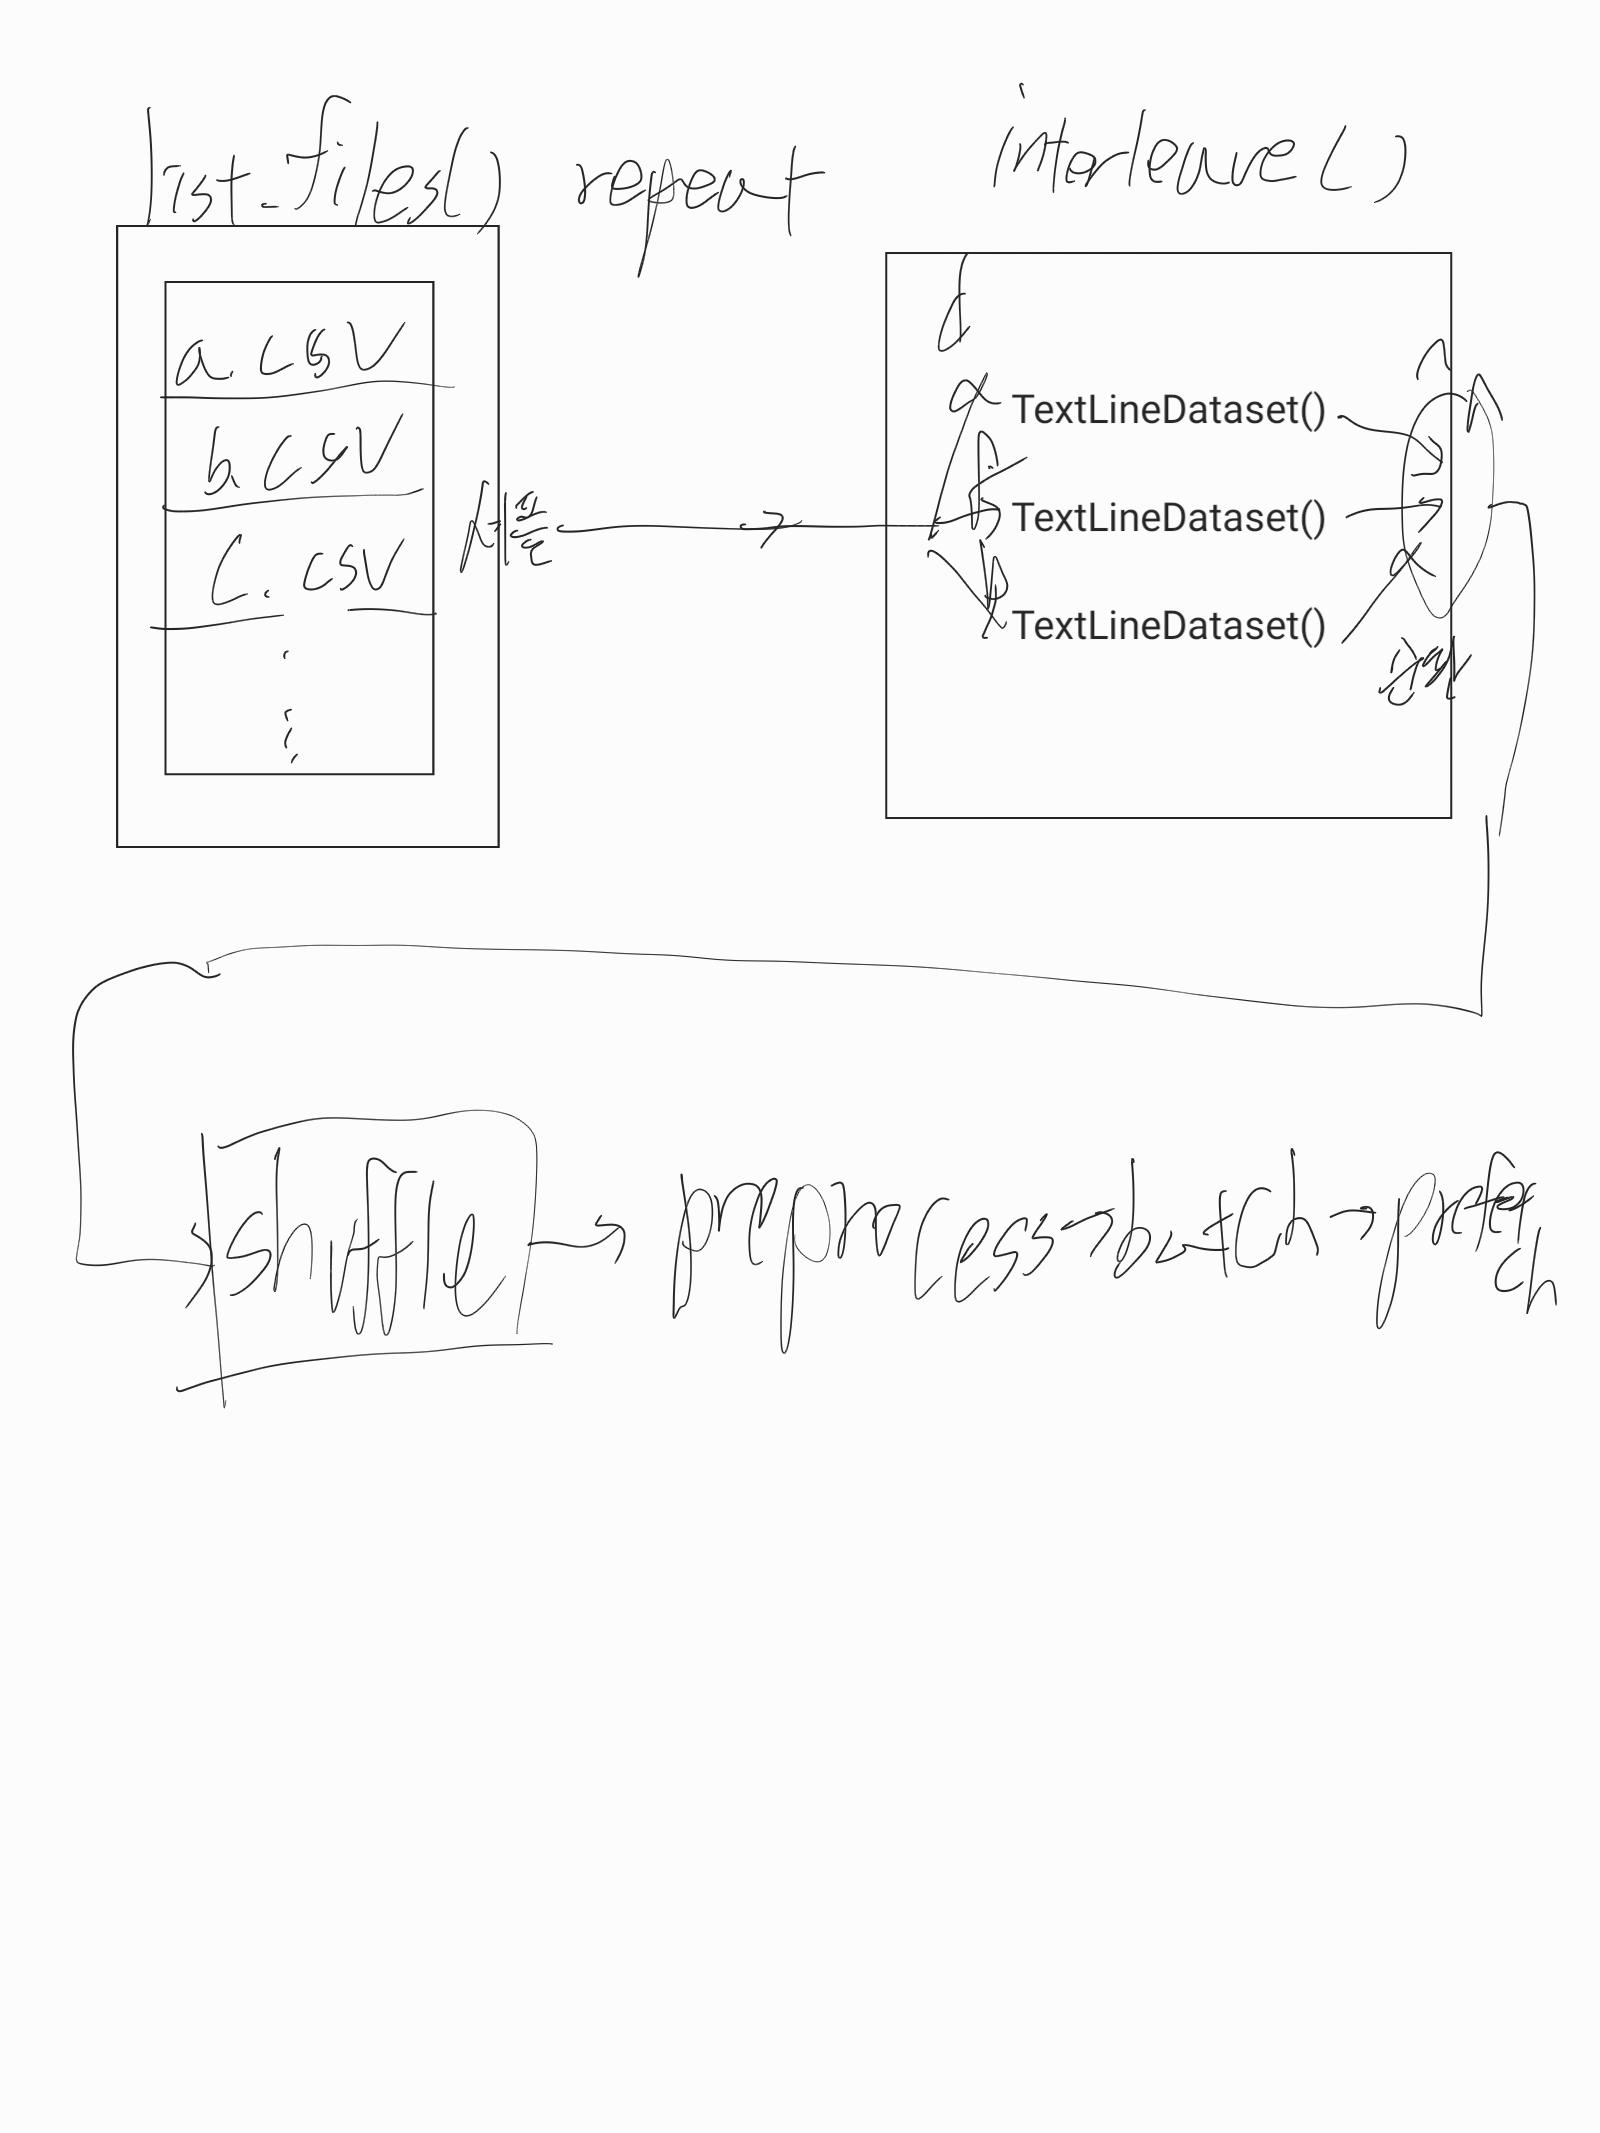

In [25]:
tf.random.set_seed(42)

train_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in train_set.take(2):
  print("X =", X_batch)
  print("y =", y_batch)
  print()

X = tf.Tensor(
[[ 0.5804519  -0.20762321  0.05616303 -0.15191229  0.01343246  0.00604472
   1.2525111  -1.3671792 ]
 [ 5.818099    1.8491895   1.1784915   0.28173092 -1.2496178  -0.3571987
   0.7231292  -1.0023477 ]
 [-0.9253566   0.5834586  -0.7807257  -0.28213993 -0.36530012  0.27389365
  -0.76194876  0.72684526]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[1.752]
 [1.313]
 [1.535]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[-0.8324941   0.6625668  -0.20741376 -0.18699841 -0.14536144  0.09635526
   0.9807942  -0.67250353]
 [-0.62183803  0.5834586  -0.19862501 -0.3500319  -1.1437552  -0.3363751
   1.107282   -0.8674123 ]
 [ 0.8683102   0.02970133  0.3427381  -0.29872298  0.7124906   0.28026953
  -0.72915536  0.86178064]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[0.919]
 [1.028]
 [2.182]], shape=(3, 1), dtype=float32)



프리페치
+ 마지막에 ```prefetch(1)```을 호출하면 데이터셋은 항상 한 배치가 미리 준비되도록 최선을 다함
+ 훈련 알고리즘이 한 배치로 작업을 한느 동안 이 데이터셋이 동시에 다음 배치를 준비함

## tf.keras와 데이터셋 사용하기

In [26]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [27]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
  keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)                               
])

In [28]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [29]:
batch_size=32
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10,
          validation_data=valid_set)

Epoch 1/10
362/362 [==============================] - 2s 5ms/step - loss: 2.0914 - val_loss: 0.9950
Epoch 2/10
362/362 [==============================] - 1s 3ms/step - loss: 0.8428 - val_loss: 0.6608
Epoch 3/10
362/362 [==============================] - 1s 3ms/step - loss: 0.6329 - val_loss: 0.6145
Epoch 4/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5922 - val_loss: 0.5832
Epoch 5/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5622 - val_loss: 0.5591
Epoch 6/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5698 - val_loss: 0.5378
Epoch 7/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5195 - val_loss: 0.5200
Epoch 8/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5155 - val_loss: 0.5055
Epoch 9/10
362/362 [==============================] - 1s 3ms/step - loss: 0.4965 - val_loss: 0.4936
Epoch 10/10
362/362 [==============================] - 1s 3ms/step - loss: 0.4925 - val_loss: 0.4825

In [30]:
model.evaluate(test_set, steps=len(X_test) // batch_size)

161/161 [==============================] - 0s 1ms/step - loss: 0.4761


0.47610989212989807

In [31]:
 new_set = test_set.take(3).map(lambda X, y: X)
 # 새로운 샘플이 3개 있다고 가정
 # new_set은 레이블을 가지고 있지 않고 있어도 케라스가 무시함.

X_new = X_test
model.predict(new_set, steps=len(X_new) // batch_size)

array([[2.464933  ],
       [0.98338735],
       [1.8042154 ],
       [1.3469855 ],
       [1.9422451 ],
       [2.071361  ],
       [3.144156  ],
       [2.3001847 ],
       [4.087692  ],
       [1.3320466 ],
       [2.3450823 ],
       [1.6057193 ],
       [1.9753588 ],
       [3.2730827 ],
       [2.2692564 ],
       [1.8003592 ],
       [1.8043977 ],
       [2.4171596 ],
       [1.7424618 ],
       [2.4545493 ],
       [1.5570526 ],
       [1.9746295 ],
       [2.8467932 ],
       [1.7848705 ],
       [1.3205788 ],
       [0.9718076 ],
       [2.871005  ],
       [2.109766  ],
       [1.3540928 ],
       [1.5075604 ],
       [1.2482035 ],
       [1.4827929 ],
       [1.6927688 ],
       [1.9553837 ],
       [0.96406853],
       [3.1100163 ],
       [2.980266  ],
       [1.9558303 ],
       [2.4878917 ],
       [3.044279  ],
       [3.1058717 ],
       [2.2627857 ],
       [1.9746647 ],
       [0.70551527],
       [1.8147583 ],
       [2.0534804 ],
       [2.3572361 ],
       [3.146

```Dataset```클래스에 있는 메서드의 간략한 설명

In [32]:
for m in dir(tf.data.Dataset):

  if not (m.startswith("_") or m.endswith("_")):

    func = getattr(tf.data.Dataset, m)

    if hasattr(func, "__doc__"):

      print("● {:21s}{}".format(m + "()", func.__doc__.split("\n")[0]))



● apply()              Applies a transformation function to this dataset.
● as_numpy_iterator()  Returns an iterator which converts all elements of the dataset to numpy.
● batch()              Combines consecutive elements of this dataset into batches.
● cache()              Caches the elements in this dataset.
● cardinality()        Returns the cardinality of the dataset, if known.
● concatenate()        Creates a `Dataset` by concatenating the given dataset with this dataset.
● element_spec()       The type specification of an element of this dataset.
● enumerate()          Enumerates the elements of this dataset.
● filter()             Filters this dataset according to `predicate`.
● flat_map()           Maps `map_func` across this dataset and flattens the result.
● from_generator()     Creates a `Dataset` whose elements are generated by `generator`. (deprecated arguments)
● from_tensor_slices() Creates a `Dataset` whose elements are slices of the given tensors.
● from_tensors()    

## TFRecord 포맷
+ 위에서 사용한 방법은 간단하고 편리하지만 효율적이지 않고 대규모의 복잡한 이미자 오디오 가은 데이터 구조를 지원하지 못함
+ 이를 위해 TFRecord 포맷 사용
+ TFRecord는 크기가 다른 연속된 이진 레코드를 저장하는 단순한 이진 포맷

```tf.io.TFRecordWriter```을 사용해서 간단히 생성 가능

In [33]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
  f.write(b'This is the first record')
  f.write(b'And this is the second record')

```tf.data.TFRecordDataset```를 사용해 읽을 수 있음

In [34]:
filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
  print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


In [35]:
filepaths = ["my_test_{}.tfrecord".format(i) for i in range(5)]
for i, filepath in enumerate(filepaths):
  with tf.io.TFRecordWriter(filepath) as f:
    for j in range(3):
      f.write("File {} record {}".format(i, j). encode("utf-8"))

dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=3)
for itme in dataset:
  print(item)

tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shap

### 압축된 TFRecord 파일

In [36]:
options = tf.io.TFRecordOptions(compression_type = "GZIP")
with tf.io.TFRecordWriter("my_compressed.tfrecord", options) as f:
  f.write(b"This is the first record")
  f.write(b"And this is the second record")

In [37]:


dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"],
                                  compression_type="GZIP")

for item in dataset:
  print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


## TFRecord에 이미지 넣기

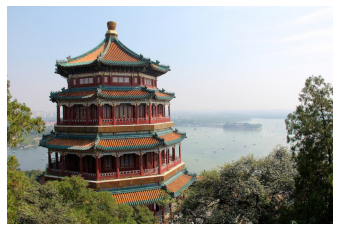

In [38]:
from sklearn.datasets import load_sample_images

img = load_sample_images()["images"][0]
plt.imshow(img)
plt.axis("off")
plt.show()

In [39]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example


data = tf.io.encode_jpeg(img)
example_with_image = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))
}))
serialized_example = example_with_image.SerializeToString()

In [40]:
feature_description = {"image" : tf.io.VarLenFeature(tf.string)}
example_with_image = tf.io.parse_single_example(serialized_example, feature_description)
decoded_img = tf.io.decode_jpeg(example_with_image["image"].values[0])

또는 `decode_image()`를 사용합니다. 이 함수는 BMP, GIF, JPEG, PNG 포맷을 지원

In [41]:
decoded_img = tf.io.decode_image(example_with_image["image"].values[0])

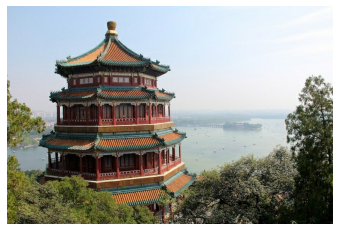

In [42]:
plt.imshow(decoded_img)
plt.axis("off")
plt.show()

`tf.io.serialize_tensor()`와 `tf.io.parse_tensor()`를 사용해 텐서를 쉽게 직렬화하고 파싱할 수 있음

In [43]:
t = tf.constant([[0., 1.], [2., 3.], [4., 5.]])
s = tf.io.serialize_tensor(t)
s

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x01\x12\x08\x12\x02\x08\x03\x12\x02\x08\x02"\x18\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00@@\x00\x00\x80@\x00\x00\xa0@'>

In [44]:
tf.io.parse_tensor(s, out_type=tf.float32)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 1.],
       [2., 3.],
       [4., 5.]], dtype=float32)>

## 입력 특성 전처리 
+ 신경망을 위해 데이터를 준비하려면 일반적으로 모든 특성을 수치 특성으로 변환하고 정규화가 필요
+ 특히 범주형 특성이나 텍스트 특성이 있다면 숫자로 바꾸어야함


## 특성 API

In [47]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [48]:
fetch_housing_data()

In [49]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [50]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [51]:
housing_median_age = tf.feature_column.numeric_column("houisng_median_age")

In [52]:
housing_median_age

NumericColumn(key='houisng_median_age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [53]:
age_mean, age_std = X_mean[1], X_std[1]
housing_median_age = tf.feature_column.numeric_column(
    "housing_median_age", normalizer_fn=lambda x: (x - age_mean) / age_std)

In [60]:
for item in housing_median_age:
  print(item)

housing_median_age
(1,)
None
<dtype: 'float32'>
<function <lambda> at 0x7f80bb17c840>


In [56]:
median_income = tf.feature_column.numeric_column("median_income")
bucketized_income = tf.feature_column.bucketized_column(
    median_income, boundaries=[1.5, 3., 4.5, 6.]
)

In [59]:
bucketized_income
for item in bucketized_income:
  print(item)

NumericColumn(key='median_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
(1.5, 3.0, 4.5, 6.0)


## 원-핫 벡터를 사용해 범주형 특성 인코딩

In [61]:
ocean_prox_vocab = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',' NEAR OCEAN']
ocean_proximity = tf.feature_column.categorical_column_with_vocabulary_list(
    "ocean_proximity", ocean_prox_vocab
)